In [20]:

import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:

train=pd.read_json('train-v2.0.json')

In [10]:
sample=train['data'][0]

In [23]:
train

,version,data
0,v2.0,"{'title': 'Beyoncé', 'paragraphs': [{'qas': [{..."
1,v2.0,"{'title': 'Frédéric_Chopin', 'paragraphs': [{'..."
2,v2.0,{'title': 'Sino-Tibetan_relations_during_the_M...
3,v2.0,"{'title': 'IPod', 'paragraphs': [{'qas': [{'qu..."
4,v2.0,{'title': 'The_Legend_of_Zelda:_Twilight_Princ...
...,...,...
437,v2.0,"{'title': 'Infection', 'paragraphs': [{'qas': ..."
438,v2.0,"{'title': 'Hunting', 'paragraphs': [{'qas': [{..."
439,v2.0,"{'title': 'Kathmandu', 'paragraphs': [{'qas': ..."
440,v2.0,"{'title': 'Myocardial_infarction', 'paragraphs..."


In [46]:
questions=[]
answers=[]
impossible=[]
for sample in train['data']:
    for i in sample['paragraphs']:
        for j in i['qas']:
            questions.append(j['question'])
            answers.append(j['answers'])
            impossible.append(j['is_impossible'])

In [47]:
len(questions),len(answers)

(130319, 130319)

In [48]:
df=pd.DataFrame({'Questions':questions,
                'Answers':answers,
                'Is_impossible':impossible})

In [49]:
df.head()

,Questions,Answers,Is_impossible
0,When did Beyonce start becoming popular?,"[{'text': 'in the late 1990s', 'answer_start':...",False
1,What areas did Beyonce compete in when she was...,"[{'text': 'singing and dancing', 'answer_start...",False
2,When did Beyonce leave Destiny's Child and bec...,"[{'text': '2003', 'answer_start': 526}]",False
3,In what city and state did Beyonce grow up?,"[{'text': 'Houston, Texas', 'answer_start': 166}]",False
4,In which decade did Beyonce become famous?,"[{'text': 'late 1990s', 'answer_start': 276}]",False


In [67]:
def grabAnswers(data):
    data=data[0]['text']
    return data

def grabAnswerstart(data):
    data=data[0]['answer_start']
    return data
    
df['Answer']=df['Answers'].apply(lambda x: grabAnswers(x))
df['Answer_start']=df['Answers'].apply(lambda x: grabAnswerstart(x))

IndexError: list index out of range

In [65]:
grabAnswers(df['Answers'][0])

'in the late 1990s'

In [57]:
df['Answers'][0][0]['answer_start']

269

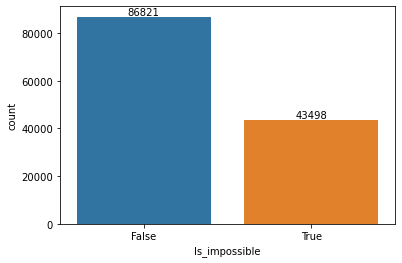

In [93]:
ax=sns.countplot(df['Is_impossible'])
pt=ax.patches

#  ax.text(rect.get_x()+rect.get_width()/2,height+5,label,ha='center',
#            va='bottom')

for rect in pt:
    height=rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,height+5,height,ha='center',
           va='bottom')

In [81]:
ax.patches[0].get_height(),ax.patches[1].get_width()

(86821, 0.8)